Develop a program to demonstrate the working of Linear Regression and Polynomial Regression. Use Boston 
Housing  Dataset  for  Linear  Regression  and  Auto  MPG  Dataset  (for  vehicle  fuel  efficiency  prediction)  for 
Polynomial Regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
data = sns.load_dataset('mpg')

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
data.shape

(398, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [8]:
data.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

### **Data Cleaning**

In [9]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [10]:
data.duplicated().sum()

0

### **Data Handling**

In [11]:
df = data.copy()

In [12]:
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

### **Discriptive Statistics**

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


### **EDA**

In [14]:
numerical = df.select_dtypes(include=['int','float']).columns
categorical = df.select_dtypes(include=['object']).columns

print(numerical)
print(categorical)

Index(['mpg', 'displacement', 'horsepower', 'acceleration'], dtype='object')
Index(['origin', 'name'], dtype='object')


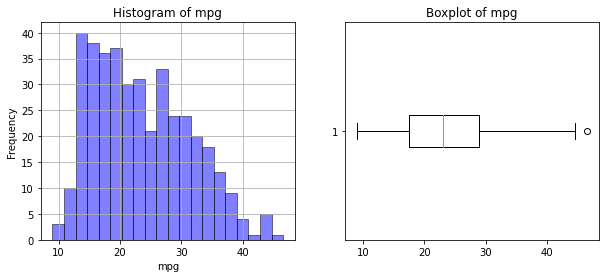

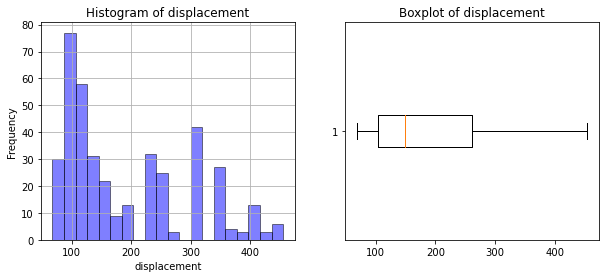

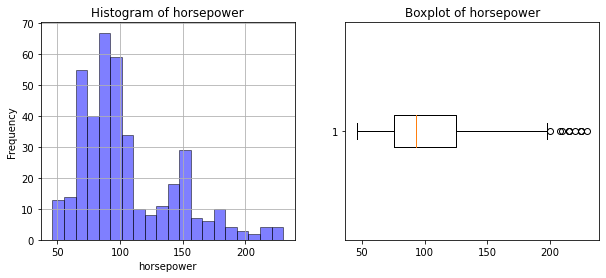

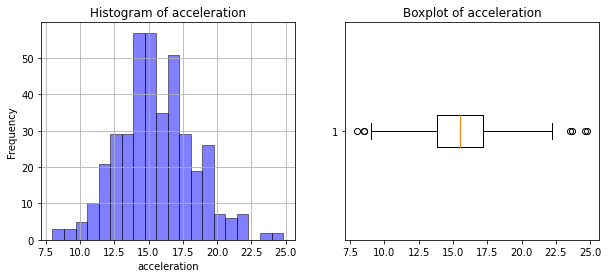

In [15]:
for i in numerical:
    plt.figure(figsize=(10,4))

    plt.subplot(1, 2, 1)
    df[i].hist(bins=20, alpha=0.5, color='b',edgecolor='black')
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.boxplot(df[i], vert=False)
    plt.title(f'Boxplot of {i}')

    plt.show()

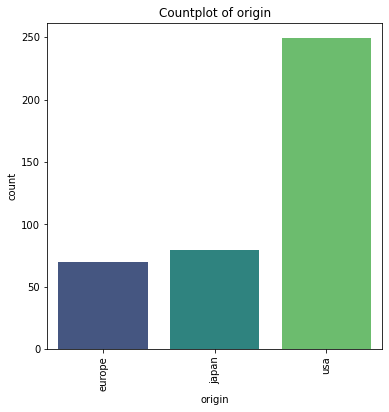

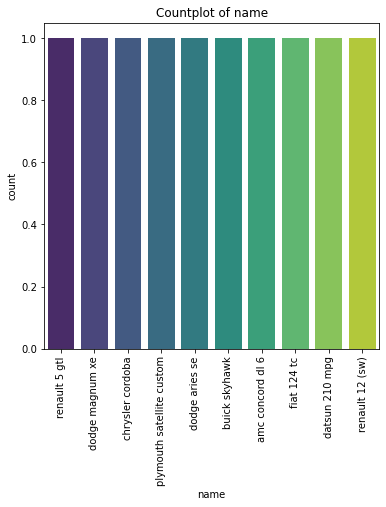

In [16]:
import seaborn as sns
for col in categorical:
    plt.figure(figsize=(6, 6))
    sns.countplot(x=col, data=df, order=df[col].value_counts().sort_values().head(10).index, palette='viridis')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=90)
    
    plt.show()

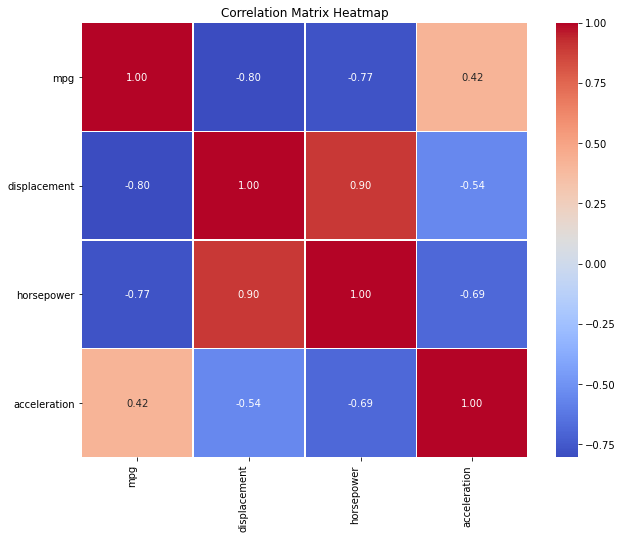

In [17]:
corr_data = df[numerical].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [18]:
# Select the relevant features
X = df[['horsepower']]  # You can select other features here
y = df['mpg']

In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Create polynomial features
degree = 2  # Change the degree of the polynomial
poly = PolynomialFeatures(degree)
X_poly_train = poly.fit_transform(X_train)

In [21]:
# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [22]:
# Make predictions
X_poly_test = poly.transform(X_test)
y_pred = model.predict(X_poly_test)

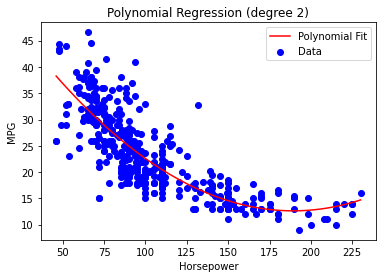

In [23]:
# Visualize the results
plt.scatter(X, y, color='blue', label='Data')
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Fit')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.title(f'Polynomial Regression (degree {degree})')
plt.show()

In [24]:
# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Squared Error (MSE): 13.94
Root Mean Squared Error (RMSE): 3.73
R-squared (R²): 0.74
